# Building RNN with Pytorch

Dans ce TD, nous allons construire un RNN from scratch avec Pytorch, en suivant les étapes suivantes:
1. Sur un problème linéaire, nous allons utiliser les torch optimizers pour trouver le paramètre de régression idéal
2. Sur un problème non-linéaire, nous allons construire un multi-layers perceptron
3. Sur un problème de texte, nous allons construire un modèle RNN

In [4]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 7.6 MB 765 kB/s eta 0:00:01
     |████████████████████████████████| 103 kB 3.9 MB/s eta 0:00:01
     |████████████████████████████████| 257 kB 2.3 MB/s eta 0:00:01
     |████████████████████████████████| 68 kB 2.4 MB/s eta 0:00:01
     |████████████████████████████████| 3.5 MB 2.9 MB/s eta 0:00:01
     |████████████████████████████████| 2.3 MB 3.4 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install torch

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 147.0 MB 3.7 MB/s eta 0:00:01    |████████                        | 36.9 MB 1.1 MB/s eta 0:01:38     |██████████                      | 46.3 MB 4.0 MB/s eta 0:00:26
     |████████████████████████████████| 5.7 MB 4.3 MB/s eta 0:00:01
     |████████████████████████████████| 133 kB 3.8 MB/s eta 0:00:01
     |████████████████████████████████| 166 kB 3.2 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 4.0 MB/s eta 0:00:01
     |████████████████████████████████| 536 kB 3.3 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [7]:
import matplotlib.pyplot as plt
import numpy as np
import torch

## Optimizers

### Données example
Nous allons construire des données $y = \beta^* X + b$


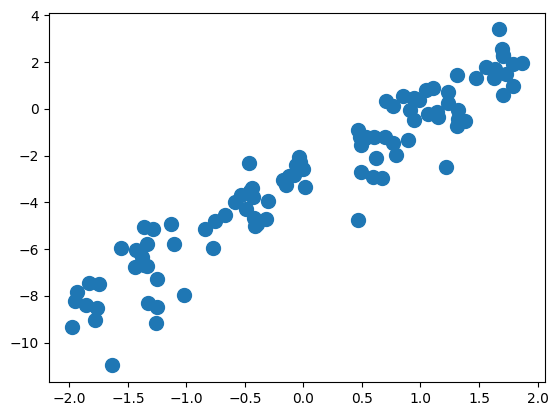

In [11]:
n = 100

a_star = 3.
b_star = -3.
noise_std = 1

x = (np.random.rand(n, 1) - 0.5) * 4
noise = np.random.normal(0, noise_std, (n, 1))
y = a_star * x + b_star + noise

x = torch.tensor(x, dtype=torch.float32)

xvec = x
plt.plot(x, y, 'o', markersize=10)

### Constuire l'optimizer

- Avec torch.nn.Parameter(), créer le paramètre beta qui sera optimisé. Les predictions du modèle sont égales à $\beta \times X$ 
- Avec torch.nn.MSELoss, déclarer la loss entre les prédictions et le résultat réel. loss.backward() pour mettre à jour les gradients
- Avec torch.optim.Adam, déclarer un optimizer
- Construisez la boucle qui, pour n_epochs, va reset les gradients, calculer la loss, mettre à jour les gradients et faire un pas pour optimiser beta

In [12]:
# Supposons que A est la matrice des caractéristiques (features)
# Vous devez définir la taille de beta en fonction de la taille de vos données
# Ajouter une colonne de 1 pour l'ordonnée à l'origine
A = torch.cat([x, torch.ones(n, 1)], dim=1)
# Pour la régression linéaire, beta devrait avoir 2 paramètres : pente et ordonnée à l'origine
beta = torch.nn.Parameter(torch.randn(2, 1))
criterion = torch.nn.MSELoss()

# Supposons que y est le vecteur de résultats réels
y = torch.randn(100, 1)  # Exemple de vecteur de résultats réels
optimizer = torch.optim.Adam([beta], lr=0.001)  # Learning rate à ajuster selon le besoin
n_epochs = 100  # Nombre d'epochs à définir

for epoch in range(n_epochs):
    optimizer.zero_grad()
    predictions = A @ beta
    loss = criterion(predictions, y)
    loss.backward()
    optimizer.step()


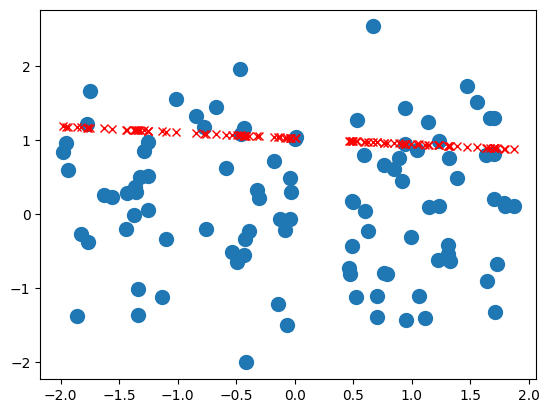

In [13]:
with torch.no_grad():  # Pas besoin de calculer les gradients ici
    plt.plot(x.numpy(), y.numpy(), 'o', markersize=10)
    plt.plot(x.numpy(), (A @ beta).numpy(), 'rx')  # Tracé des prédictions


## Construire un multi-layer perceptron (MLP)

Ici, les données sont $y = a x^2 + b$

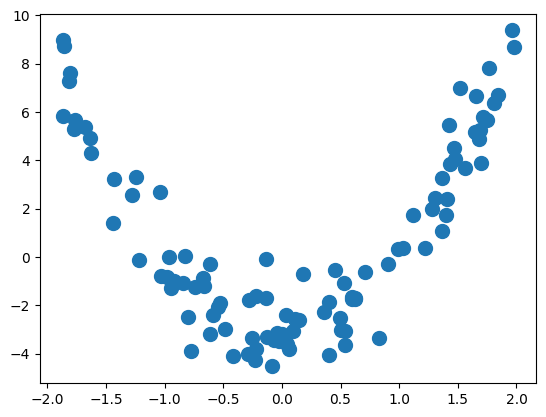

In [38]:
n = 100

a_star = 3.
b_star = -3.
noise_std = 1

x = (np.random.rand(n, 1) - 0.5) * 4
noise = np.random.normal(0, noise_std, (n, 1))
y = a_star * (x ** 2) + b_star + noise

x = torch.tensor(x, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)


xvec = x
plt.plot(x, y, 'o', markersize=10)

Nous allons construire un Pytorch modèle. Dans ce framework, on définit la fonction "forward" qui prend en argument les inputs et retourne les prédictions.

A l'aide de torch.nn.Module et de différentes layers (torch.nn.Linear, torch.nn.ReLU), terminez la classe ci-dessous pour créer un multi-layers perceptron 

In [39]:
import torch.nn as nn
import torch.optim as optim

class MLP(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(MLP, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.layer2 = nn.Linear(hidden_size, 1)  # Sortie unique pour la régression

    def forward(self, x):
        out = self.layer1(x)
        out = self.relu(out)
        out = self.layer2(out)
        return out



En utilisant le travail précédent, faite une cellule utilisant un torch optimizer pour optimiser le MLP 

In [62]:
input_size = 1
hidden_size = 1000  # Vous pouvez ajuster cela
model = MLP(input_size, hidden_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)
num_epochs = 1000  # Ajustez selon le besoin
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(x)
    loss = criterion(outputs, y)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


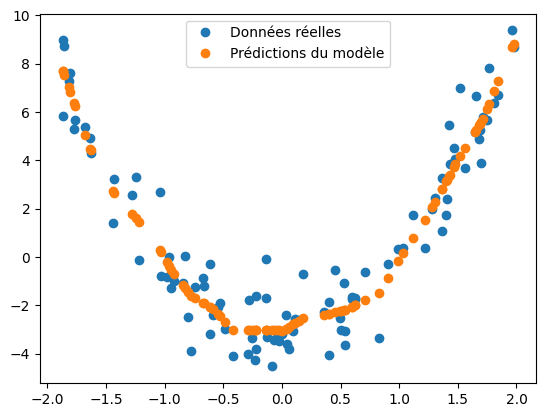

In [64]:
# Prédire les valeurs y à partir de x
y_pred = model(x).detach()  # .detach() pour retirer les gradients

# Tracer les données réelles
plt.plot(x.numpy(), y.numpy(), 'o', label='Données réelles')

# Tracer les prédictions du modèle
plt.plot(x.numpy(), y_pred.numpy(), 'o', label='Prédictions du modèle')

plt.legend()
plt.show()


## Construire un Recurrent Neural Network (RNN) from scratch

### Données
 
Téléchargez [ici](https://download.pytorch.org/tutorial/data.zip) un jeu de données "nom" -> pays d'origine du nom.
Les noms de chaque pays sont dans leur fichier texte "[country].txt"

A partir de ces données, créez X la liste des noms et y le pays d'origine de chaque nom

### Aide pour générer les données

A la fin de ce code, on lit les noms et leur pays d'origine.<br>
On a une fonction randomTrainingExample, qui génère le pays d'origine et le nom (en texte), puis l'ID de ce pays et le tenseur représetant le nom. <br>

A partir de là, vous pouvez générer les données X, y comme vous voulez

In [6]:
# Code pour générer le jeu de données
# En admettant que les fichiers ont été extraits dans data/raw/names/

import math
import numpy as np
from pathlib import Path
import random

import string
import time
import unicodedata


path = Path("data/raw/names/")

In [7]:
def read_names(path):
    category_lines = {}
    for file in path.iterdir():
        if not file.name.endswith(".txt"):
            continue
            
        with open(file) as f:
            names = [unicodeToAscii(line.strip()) for line in f]
        
        category = file.stem
        category_lines[category] = names

    return category_lines

# Handling ASCII stuff
all_letters = string.ascii_letters + " .,;'"
n_letters = len(all_letters)

# Turn a Unicode string to plain ASCII, thanks to https://stackoverflow.com/a/518232/2809427
def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )

In [8]:
category_lines = read_names(path)
all_categories = list(category_lines.keys())
n_categories = len(all_categories)

In [9]:
import torch

# Find letter index from all_letters, e.g. "a" = 0
def letterToIndex(letter):
    return all_letters.find(letter)

# Just for demonstration, turn a letter into a <1 x n_letters> Tensor
def letterToTensor(letter):
    tensor = torch.zeros(1, n_letters)
    tensor[0][letterToIndex(letter)] = 1
    return tensor

# Turn a line into a <line_length x 1 x n_letters>,
# or an array of one-hot letter vectors
def lineToTensor(line):
    tensor = torch.zeros(len(line), 1, n_letters)
    for li, letter in enumerate(line):
        tensor[li][0][letterToIndex(letter)] = 1
    return tensor

In [10]:
def randomChoice(l):
    return l[random.randint(0, len(l) - 1)]

def randomTrainingExample():
    category = randomChoice(all_categories)
    line = randomChoice(category_lines[category])
    category_tensor = torch.tensor([all_categories.index(category)], dtype=torch.long)
    line_tensor = lineToTensor(line)
    return category, line, category_tensor, line_tensor

for i in range(10):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    print('category =', category, '/ line =', line)

category = Arabic / line = Isa
category = Dutch / line = Houtum
category = Spanish / line = Bengochea
category = French / line = Lemieux
category = Russian / line = Bawilin
category = Greek / line = Kouropoulos
category = Russian / line = Pavlyuchenko
category = Japanese / line = Mishima
category = Greek / line = Sotiris
category = Spanish / line = Fernandez


### Construire le RNN

Un Recurrent Neural Network prend, pour prédire un input X et un hidden state H.<br>
Il output une prédiction et un nouvel hidden state pour la prochaine étape.<br>
Nous allons construire un modèle:

$f(name, H_0) = (proba(\mbox{name from country 0}), proba(\mbox{name from country 1}), \dots)$

Avec $H_0$ un hidden state initial (qui sera appris).

Pour l'instant, nous allons construire un RNN linéaire.<br>
Comme pour le MLP, construisez un torch.nn.Module:
- A l'init, la classe prendra les arguments input_size, hidden_state_dim, output_size
- L'init déclare un paramètre pour l'hidden state initial $H_0$, une layer linéaire prenant (input, hidden_state) -> output_size
- Le forward fonctionnera ainsi:
    - hidden_state = $H_0$
    - For letter in name:
        - x = one-hot encode (letter)
        - output, hidden_state = linear_layer(x, hidden_state)
    - return softmax(output)


In [24]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size
        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.i2o = nn.Linear(input_size + hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
        combined = torch.cat((input, hidden), 1)
        hidden = self.i2h(combined)
        output = self.i2o(combined)
        output = self.softmax(output)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, self.hidden_size)


A l'aide de la negative log likelihood (torch.nn.NLLLoss), construisez une boucle optimisant ce modèle (optimizer, itération au sein des examples).

**Attention 1:** Ici, on n'a pas des tenseurs X, y. On va prendre les exemples 1 par 1.<br>
**Attention 2:** Si le modèle apprend les examples dans l'ordre (d'abord tous les noms arabes, puis tous les chinois, puis tous les tchèques, etc), cela changera grandement le résulat (et le modèle sera très mauvais)

In [25]:
# Partie 3: Boucle d'Entraînement
def train(category_tensor, line_tensor, rnn, criterion, optimizer):
    hidden = rnn.initHidden()
    rnn.zero_grad()

    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)

    loss = criterion(output, category_tensor)
    loss.backward()
    optimizer.step()

    return output, loss.item()

def randomTrainingExample():
    category = random.choice(all_categories)
    line = random.choice(category_lines[category])
    category_tensor = torch.tensor([all_categories.index(category)], dtype=torch.long)
    line_tensor = lineToTensor(line)
    return category, line, category_tensor, line_tensor

# Initialisation du RNN
n_hidden = 128
rnn = RNN(n_letters, n_hidden, n_categories)

# Loss et Optimizer
criterion = nn.NLLLoss()
learning_rate = 0.005
optimizer = torch.optim.SGD(rnn.parameters(), lr=learning_rate)

# Entraînement
n_iters = 100000
print_every = 5000
current_loss = 0

for iter in range(1, n_iters + 1):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output, loss = train(category_tensor, line_tensor, rnn, criterion, optimizer)
    current_loss += loss

    if iter % print_every == 0:
        print(f'Iter {iter} / {n_iters} Loss: {current_loss / print_every:.4f}')
        current_loss = 0

Iter 5000 / 100000 Loss: 2.7870
Iter 10000 / 100000 Loss: 2.3283
Iter 15000 / 100000 Loss: 2.0577
Iter 20000 / 100000 Loss: 1.8834
Iter 25000 / 100000 Loss: 1.7914
Iter 30000 / 100000 Loss: 1.6798
Iter 35000 / 100000 Loss: 1.6342
Iter 40000 / 100000 Loss: 1.5724
Iter 45000 / 100000 Loss: 1.5365
Iter 50000 / 100000 Loss: 1.4861
Iter 55000 / 100000 Loss: 1.5049
Iter 60000 / 100000 Loss: 1.3973
Iter 65000 / 100000 Loss: 1.3907
Iter 70000 / 100000 Loss: 1.3676
Iter 75000 / 100000 Loss: 1.3859
Iter 80000 / 100000 Loss: 1.3583
Iter 85000 / 100000 Loss: 1.3378
Iter 90000 / 100000 Loss: 1.3552
Iter 95000 / 100000 Loss: 1.3179
Iter 100000 / 100000 Loss: 1.2750


## Utilisez les RNNs de Pytorch

Sur le même jeu de données, nous allons utiliser les RNNs déjà codés par Pytorch.<br>

### Padding

Nous voulons aussi utiliser des tenseurs X et y pour utiliser data loader pour les batchs, etc


Avec du padding, créer un tenseur X de la taille (nb_data, name_max_length, vocab_size). <br>
X[i, j, :] contient le one-hot encode de la j-ème lettre du i-ème prénom. Si le i-ème prénom a moins de j lettre, alors X[i, j, :] est un vecteur nul

In [27]:
def nameToTensor(name, max_length):
    tensor = torch.zeros(max_length, n_letters)
    for li, letter in enumerate(name):
        tensor[li][all_letters.find(letter)] = 1
    return tensor

max_length = max(len(name) for names in category_lines.values() for name in names)
nb_data = sum(len(names) for names in category_lines.values())

X = torch.zeros(nb_data, max_length, n_letters)
y = torch.zeros(nb_data, dtype=torch.long)

index = 0  # Index séquentiel pour X et y
for category in all_categories:
    for name in category_lines[category]:
        X[index] = nameToTensor(name, max_length)
        y[index] = all_categories.index(category)
        index += 1  # Incrémenter l'index après chaque nom



### Modèle

Construisez un modèle qui:
- A l'init, déclare un hidden state initial $H_0$, un RNN (avec torch.nn.RNN)
- Au forward, passe (input, $H_0$) dans le RNN, puis applique un softmax à l'output

In [28]:
class RNNModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNNModel, self).__init__()
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        batch_size = x.size(0)
        hidden = self.initHidden(batch_size)
        out, hidden = self.rnn(x, hidden)
        out = self.fc(out[:, -1, :])  # Prendre la dernière sortie de RNN pour chaque nom
        return F.log_softmax(out, dim=1)

    def initHidden(self, batch_size):
        return torch.zeros(1, batch_size, self.hidden_size)


Entraînez le modèle avec des batchs de X, y

In [29]:
from torch.utils.data import DataLoader, TensorDataset

dataset = TensorDataset(X, y)
loader = DataLoader(dataset, batch_size=64, shuffle=True)

n_hidden = 128
model = RNNModel(n_letters, n_hidden, n_categories)
criterion = nn.NLLLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.005)

for epoch in range(5):  # Nombre d'époques
    for batch_X, batch_y in loader:
        optimizer.zero_grad()
        output = model(batch_X)
        loss = criterion(output, batch_y)
        loss.backward()
        optimizer.step()
    print(f'Epoch {epoch + 1}, Loss: {loss.item()}')


Epoch 1, Loss: 1.787037968635559
Epoch 2, Loss: 1.8740615844726562
Epoch 3, Loss: 1.668428659439087
Epoch 4, Loss: 1.986592411994934
Epoch 5, Loss: 1.7425355911254883


### Amélioration du modèle

Tenter d'améliorer le modèle:
- En utilisant plusieurs layers dans le RNN
- En utilisant LSTM à la place de RNN (une autre forme de recurrent neural network, plus avancé)

(regardez la doc)

In [30]:
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=1):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        batch_size = x.size(0)
        hidden = self.initHidden(batch_size)
        out, (hidden, _) = self.lstm(x, hidden)
        out = self.fc(out[:, -1, :])
        return F.log_softmax(out, dim=1)

    def initHidden(self, batch_size):
        return (torch.zeros(self.num_layers, batch_size, self.hidden_size),
                torch.zeros(self.num_layers, batch_size, self.hidden_size))


In [31]:
from torch.utils.data import DataLoader, TensorDataset

dataset = TensorDataset(X, y)
loader = DataLoader(dataset, batch_size=64, shuffle=True)

n_hidden = 128
model = LSTMModel(n_letters, n_hidden, n_categories)
criterion = nn.NLLLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.005)

for epoch in range(5):  # Nombre d'époques
    for batch_X, batch_y in loader:
        optimizer.zero_grad()
        output = model(batch_X)
        loss = criterion(output, batch_y)
        loss.backward()
        optimizer.step()
    print(f'Epoch {epoch + 1}, Loss: {loss.item()}')


Epoch 1, Loss: 2.463064193725586
Epoch 2, Loss: 1.985414981842041
Epoch 3, Loss: 1.700084924697876
Epoch 4, Loss: 1.690616250038147
Epoch 5, Loss: 1.6722506284713745


### Embedding

On veut utiliser en embedding pour les lettres.
Le forward appliquerait l'embedding aux lettres, puis les layers RNN prendrait l'embedding comme input

Nous allons utiliser torch.nn.Embedding
**Attention**: Embedding ne prend pas les lettres one-hot encoded, mais leurs indices.
Par exemple, "abca", il lui faudrait le vecteur [0, 1, 2, 0]<br>
et non [[1, 0, 0], [0, 1, 0], [0, 0, 1], [1, 0, 0]]

**Expérimenter torch.nn.Embedding**<br>
Instantier "emb" une torch.nn.Embedding avec les bons paramètres (regardez la doc)
En construisant le bon tenseur X_emb,

```emb(X_emb)```

doit retourner un tenseur (qui n'a pas de sens car il n'a rien appris pour l'instant, mais les opérations se passent bien)

In [46]:
def nameToIndices(name):
    return [all_letters.find(letter) for letter in name]

# Création du tenseur X_indices
X_indices = torch.zeros(nb_data, max_length, dtype=torch.long)

index = 0  # Index séquentiel pour X_indices
for category in all_categories:
    for name in category_lines[category]:
        indices = nameToIndices(name)
        for idx, letter_idx in enumerate(indices):
            X_indices[index][idx] = letter_idx
        index += 1  # Incrémenter l'index après chaque nom
        

In [47]:
embedding_dim = 64  # Taille de l'embedding
emb = nn.Embedding(n_letters, embedding_dim)
n_categories = len(all_categories)  # Nombre de catégories (langues)
learning_rate = 0.005  # Taux d'apprentissage

# Création du dataset et du DataLoader
dataset = TensorDataset(X_indices, y)
loader = DataLoader(dataset, batch_size=128, shuffle=True)  # Augmenter la taille du batch

Construisez un modèle RNN, où les lettres passent par l'embedding avant d'être envoyées dans les couches de RNN.
Construisez une loop d'apprentissage

Expérimentez plusieurs valeurs pour le nombre de couche, la taille d'embedding ou les tailles d'hidden state.<br>
Quel neg log likelihood obtenez-vous ?

In [48]:
class RNNModel(nn.Module):
    def __init__(self, embedding_dim, hidden_size, output_size, num_layers=1):
        super(RNNModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.embedding = nn.Embedding(n_letters, embedding_dim)
        self.rnn = nn.RNN(embedding_dim, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        batch_size = x.size(0)
        x = self.embedding(x)  # Appliquer l'embedding
        hidden = self.initHidden(batch_size)
        out, hidden = self.rnn(x, hidden)
        out = self.fc(out[:, -1, :])
        return F.log_softmax(out, dim=1)

    def initHidden(self, batch_size):
        return torch.zeros(self.num_layers, batch_size, self.hidden_size)

In [49]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

#  Initialisation du modèle et de l'optimiseur
model = RNNModel(embedding_dim, n_hidden, n_categories)
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


# Boucle d'apprentissage
n_iters = 1000
for iter in range(1, n_iters + 1):
    for batch, (X_batch, y_batch) in enumerate(loader):
        optimizer.zero_grad()
        output = model(X_batch)
        loss = criterion(output, y_batch)
        loss.backward()
        optimizer.step()

    # Affichage de la progression
    if iter % 100 == 0:
        print(f'Iter {iter} / {n_iters} Loss: {loss.item():.4f}')


Iter 100 / 1000 Loss: 2.0198
Iter 200 / 1000 Loss: 1.7611
Iter 300 / 1000 Loss: 2.0445
Iter 400 / 1000 Loss: 1.7085
Iter 500 / 1000 Loss: 1.9690
Iter 600 / 1000 Loss: 1.7737
Iter 700 / 1000 Loss: 1.9396
Iter 800 / 1000 Loss: 2.0809
Iter 900 / 1000 Loss: 2.0677
Iter 1000 / 1000 Loss: 1.6675
